In [3]:
import tensorflow as tf
import numpy as np

fac = 5
Mnist = tf.keras.datasets.mnist

class Linear_Layer:

    def __init__(self, in_dim, out_dim, alpha=0.01, Theta=None, bias=None):
        self.alpha = alpha  # 학습률(alpha) 초기화

        # Theta(가중치 행렬)가 주어지지 않으면 무작위로 생성
        if Theta is None:
            self.Theta = np.random.randn(in_dim, out_dim) / fac  # 무작위 가중치 행렬 생성
        else:
            self.Theta = Theta  # 주어진 Theta 사용

        # bias(편향 벡터)가 주어지지 않으면 무작위로 생성
        if bias is None:
            self.bias = np.random.randn(out_dim) / fac  # 무작위 편향 벡터 생성
        else:
            self.bias = bias  # 주어진 bias 사용

    # 순전파 메서드 정의
    def forward_pass(self, X):
        self.X = X
        self.z = np.matmul(X, self.Theta) + self.bias  # 선형 변환 계산
        return self.z

    # 역전파 메서드 정의
    def backprop(self, grad_previous):
        t = self.X.shape[0]  # 입력 데이터의 행 수
        self.grad = np.matmul(self.X.transpose(), grad_previous) / t  # Theta에 대한 그래디언트 계산
        self.grad_bias = grad_previous.sum(axis=0) / t  # 편향에 대한 그래디언트 계산
        self.grad_a = np.matmul(grad_previous, self.Theta.transpose())  # 입력에 대한 그래디언트 계산
        return self.grad_a

    # 확률적 경사 하강법(SGD)을 적용하는 메서드 정의
    def applying_sgd(self):
        self.Theta = self.Theta - (self.alpha * self.grad)  # Theta 업데이트
        self.bias = self.bias - (self.alpha * self.grad_bias)  # 편향 업데이트

class softmax:

    def __init__(self):
        pass

    # 원-핫 인코딩을 수행하는 메서드
    def expansion(self, t):
        (a,) = t.shape  # 입력 벡터의 길이(a)를 가져옴
        Y = np.zeros((a, 10))  # 10개의 클래스에 대한 원-핫 인코딩을 위한 빈 행렬 생성
        for i in range(0, a):
            Y[i, t[i]] = 1  # 입력 벡터의 각 원소에 대해 해당하는 클래스 인덱스를 1로 설정
        return Y

    # 순전파 메서드 정의
    def forward_pass(self, z):
        self.z = z  # 입력값 저장
        (p, t) = self.z.shape  # p: 입력 데이터의 개수, t: 클래스 수
        self.a = np.zeros((p, t))  # 출력값을 저장할 배열 초기화
        for i in range(0, p):
            for ii in range(0, t):
                # 소프트맥스 함수를 이용하여 클래스 확률 계산
                self.a[i, ii] = (np.exp(self.z[i, ii])) / (np.sum(np.exp(self.z[i, :])))
        return self.a  # 계산된 클래스 확률 반환

    # 역전파 메서드 정의
    def backprop(self, Y):
        y = self.expansion(Y)  # 실제 클래스를 원-핫 인코딩으로 변환
        self.grad = (self.a - y)  # 그래디언트 계산
        return self.grad  # 그래디언트 반환

    def applying_sgd(self):
        pass  # 확률적 경사 하강법(SGD)

class relu:
    def __init__(self):
        pass

    # 순전파 메서드 정의
    def forward_pass(self, z):
        if len(z.shape) == 3:  # 입력이 3차원인 경우
            z_temp = z.reshape((z.shape[0], z.shape[1] * z.shape[2]))  # 3차원 배열을 2차원으로 변환
            z_temp_1 = self.forward_pass(z_temp)  # 2차원 배열에 대해 순전파를 재귀적으로 호출
            self.a_1 = z_temp_1.reshape((z.shape[0], z.shape[1], z.shape[2]))  # 결과를 다시 3차원으로 변환
            return self.a_1

        else:  # 입력이 2차원인 경우
            (p, t) = z.shape  # p: 데이터 개수, t: 특성 수
            self.a = np.zeros((p, t))  # 출력값을 저장할 배열 초기화
            for i in range(0, p):
                for ii in range(0, t):
                    self.a[i, ii] = max([0, z[i, ii]])  # ReLU 활성화 함수 적용
            return self.a

    # ReLU 함수의 도함수를 계산하는 메서드 정의
    def derivative(self, a):
        if a > 0:
            return 1
        else:
            return 0

    # 역전파 메서드 정의
    def backprop(self, grad_previous):
        if len(grad_previous.shape) == 3:  # 입력이 3차원인 경우
            (d, p, t) = grad_previous.shape
            self.grad = np.zeros((d, p, t))  # 출력값에 대한 그래디언트를 저장할 배열 초기화

            for i in range(d):
                for ii in range(p):
                    for iii in range(t):
                        # ReLU 함수의 도함수를 적용한 그래디언트 계산
                        self.grad[i, ii, iii] = (grad_previous[i, ii, iii] * self.derivative(self.a_1[i, ii, iii]))

            return self.grad

        else:  # 입력이 2차원인 경우
            (p, t) = grad_previous.shape
            self.grad = np.zeros((p, t))  # 출력값에 대한 그래디언트를 저장할 배열 초기화
            for i in range(p):
                for ii in range(t):
                    # ReLU 함수의 도함수를 적용한 그래디언트 계산
                    self.grad[i, ii] = grad_previous[i, ii] * self.derivative(self.a[i, ii])
            return self.grad

    def applying_sgd(self):
        pass  # 확률적 경사 하강법(SGD)


class padding():

    def __init__(self, pad=1):
        self.pad = pad

    # 순전파 메서드 정의
    def forward_pass(self, data):
        # 입력 데이터 주위에 패딩을 추가하여 출력 데이터 생성
        X = np.pad(data, ((0, 0), (self.pad, self.pad), (self.pad, self.pad)), 'constant', constant_values=0)
        return X

    # 역전파 메서드 정의
    def backprop(self, y):
        # 출력 데이터의 패딩을 제거하고 반환
        return y[:, 1:(y.shape[1] - 1), 1:(y.shape[2] - 1)]

    def applying_sgd(self):
        pass  # 확률적 경사 하강법(SGD)

class Convolutional_Layer:
    def __init__(self, filter_dim=3, stride=1, pad=1, alpha=0.01):
        self.filter_dim = filter_dim
        self.stride = stride
        self.filter = np.random.randn(self.filter_dim, self.filter_dim)
        self.filter = self.filter / self.filter.sum()
        self.bias = np.random.rand() / 10
        self.pad = pad
        self.alpha = alpha

    # 컨볼루션 연산을 수행하는 메서드 정의
    def convolving(self, X, fil, dimen_x, dimen_y):
        z = np.zeros((dimen_x, dimen_y))
        for i in range(dimen_x):
            for ii in range(dimen_y):
                temp = np.multiply(X[i: i + fil.shape[0], ii: ii + fil.shape[1]], fil)
                z[i, ii] = temp.sum()
        return z

    # 순전파 메서드 정의
    def forward_pass(self, X):
        self.X = X
        (d, p, t) = self.X.shape
        dimen_x = int(((p - self.filter_dim) / self.stride) + 1)
        dimen_y = int(((t - self.filter_dim) / self.stride) + 1)
        self.z = np.zeros((d, dimen_x, dimen_y))
        for i in range(d):
            self.z[i] = (self.convolving(self.X[i], self.filter, dimen_x, dimen_y) + self.bias)

        return self.z

    # 역전파 메서드 정의
    def backprop(self, grad_z):
        (d, p, t) = grad_z.shape
        filter_1 = np.flip((np.flip(self.filter, axis=0)), axis=1)
        self.grads = np.zeros((d, p, t))
        for i in range(d):
            self.grads[i] = self.convolving(np.pad(grad_z[i], ((1, 1), (1, 1)), 'constant', constant_values=0),
                                            filter_1, p, t)

        self.grads = np.pad(self.grads, ((0, 0), (1, 1), (1, 1)), 'constant', constant_values=0)

        self.grad_filter = np.zeros((self.filter_dim, self.filter_dim))

        for i in range(self.filter_dim):
            for ii in range(self.filter_dim):
                self.grad_filter[i, ii] = (np.multiply(grad_z, self.X[:, i:p + i, ii:t + ii])).sum()
        self.grad_filter = self.grad_filter / (d)

        self.grad_bias = (grad_z.sum()) / (d)
        return self.grads

    def applying_sgd(self):
        # 확률적 경사 하강법(SGD)을 사용하여 가중치와 편향 업데이트
        self.filter = self.filter - (self.alpha * self.grad_filter)
        self.bias = self.bias - (self.alpha * self.grad_bias)

class pooling:

    def __init__(self, pool_dim=2, stride=2):
        self.pool_dim = pool_dim  # 풀링 윈도우의 크기
        self.stride = stride  # 스트라이드 값

    # 순전파 메서드 정의
    def forward_pass(self, data):
        (q, p, t) = data.shape  # 입력 데이터의 형태
        z_x = int((p - self.pool_dim) / self.stride) + 1  # x 축에 대한 풀링 결과 크기
        z_y = int((t - self.pool_dim) / self.stride) + 1  # y 축에 대한 풀링 결과 크기
        after_pool = np.zeros((q, z_x, z_y))  # 풀링 결과를 저장할 배열 초기화

        for ii in range(0, q):  # 배치 개수만큼 반복
            liss = []  # 풀링 결과를 저장할 리스트 초기화
            for i in range(0, p, self.stride):
                for j in range(0, t, self.stride):
                    if (i + self.pool_dim <= p) and (j + self.pool_dim <= t):
                        temp = data[ii, i:(i + self.pool_dim), j:(j + self.pool_dim)]
                        temp_1 = np.max(temp)  # 최대값 풀링 연산 수행
                        liss.append(temp_1)  # 결과를 리스트에 추가
            liss = np.asarray(liss)  # 리스트를 NumPy 배열로 변환
            liss = liss.reshape((z_x, z_y))  # 결과를 풀링 크기에 맞게 재구성
            after_pool[ii] = liss  # 풀링 결과를 저장

        return after_pool  # 풀링 결과 반환

    # 역전파 메서드 정의
    def backprop(self, pooled):
        (a, b, c) = pooled.shape  # 풀링 결과의 형태
        cheated = np.zeros((a, 2 * b, 2 * c))  # 역전파 결과를 저장할 배열 초기화

        for k in range(0, a):  # 배치 개수만큼 반복
            pooled_transpose_re = pooled[k].reshape((b * c))  # 풀링 결과를 벡터 형태로 재구성
            count = 0  # 역전파 결과를 저장할 인덱스 초기화
            for i in range(0, 2 * b, self.stride):
                for j in range(0, 2 * c, self.stride):
                    cheated[k, i:(i + self.stride), j:(j + self.stride)] = pooled_transpose_re[count]
                    count = count + 1  # 역전파 결과 갱신

        return cheated  # 역전파 결과 반환

    def applying_sgd(self):
        pass  # 확률적 경사 하강법(SGD)

class Neural_Network:

    def __init__(self, Network):
        self.Network = Network  # 네트워크 레이어들을 리스트로 받아 초기화

    # 순전파 메서드 정의
    def forward_pass(self, X):
        n = X
        for i in self.Network:
            n = i.forward_pass(n)  # 각 레이어를 통해 순전파 진행

        return n  # 최종 결과 반환

    # 역전파 메서드 정의
    def backprop(self, Y):
        m = Y
        for i in reversed(self.Network):
            m = i.backprop(m)  # 각 레이어를 역순으로 통해 역전파 진행

    # 확률적 경사 하강법(SGD)을 적용하는 메서드 정의
    def applying_sgd(self):
        for i in self.Network:
            i.applying_sgd()  # 각 레이어에 대해 SGD 적용

class reshaping:

    def __init__(self):
        pass

    # 순전파 메서드 정의
    def forward_pass(self, a):
        self.shape_a = a.shape  # 입력 데이터의 형태(shape) 저장

        # 입력 데이터를 2차원 형태로 재구성하여 반환
        self.final_a = a.reshape(self.shape_a[0], self.shape_a[1] * self.shape_a[2])
        return self.final_a

    # 역전파 메서드 정의
    def backprop(self, q):
        # 역전파 시에는 입력 데이터의 형태를 원래 형태로 재구성하여 반환
        return q.reshape(self.shape_a[0], self.shape_a[1], self.shape_a[2])

    def applying_sgd(self):
        pass  # 확률적 경사 하강법(SGD)

class cross_entropy:

    def __init__(self):
        pass

    # 원-핫 인코딩을 수행하는 메서드
    def expansion(self, t):
        (a,) = t.shape
        Y = np.zeros((a, 10))  # 10개의 클래스에 대한 원-핫 인코딩을 위한 빈 행렬 생성
        for i in range(0, a):
            Y[i, t[i]] = 1  # 입력 벡터의 각 원소에 대해 해당하는 클래스 인덱스를 1로 설정
        return Y

    # 크로스 엔트로피 손실을 계산하는 메서드
    def loss(self, A, Y):
        exp_Y = self.expansion(Y)  # 실제 클래스를 원-핫 인코딩으로 변환
        (u, i) = A.shape  # u: 데이터 개수, i: 클래스 수
        loss_matrix = np.zeros((u, i))  # 손실 값을 저장할 배열 초기화
        for j in range(u):
            for jj in range(i):
                if exp_Y[j, jj] == 0:
                    loss_matrix[j, jj] = np.log(1 - A[j, jj])
                else:
                    loss_matrix[j, jj] = np.log(A[j, jj])

        # 전체 손실의 평균을 계산하여 반환
        return ((-(loss_matrix.sum())) / u)

class accuracy:
    def __init__(self):
        pass

    # 정확도를 계산하는 메서드
    def value(self, out, Y):
        self.out = np.argmax(out, axis=1)  # 출력값(out)에서 가장 큰 값의 인덱스를 가져옴
        p = self.out.shape[0]  # 데이터 개수
        total = 0  # 정확하게 예측된 데이터 수를 저장하는 변수
        for i in range(p):
            if Y[i] == self.out[i]:  # 실제 클래스(Y)와 예측 클래스(self.out)가 일치하면
                total += 1  # 정확하게 예측된 데이터 수를 증가
        return total / p  # 정확도를 전체 데이터 개수로 나누어 반환

(Xtr, Ytr), (Xte, Yte) = Mnist.load_data()
X_testing = Xtr[:, :, :]
Y_testing = Ytr[:]
X_testing = X_testing/255  # 입력 데이터를 0과 1 사이로 스케일링
al = 0.3  # 학습률(learning rate)
stopper = 85.0  # 정확도가 이 값 이상이면 훈련 중단

complete_NN = Neural_Network([

                                padding(),
                                Convolutional_Layer(),
                                pooling(),
                                relu(),
                                padding(),
                                Convolutional_Layer(),
                                pooling(),
                                relu(),
                                reshaping(),
                                Linear_Layer(7*7, 24, alpha = al), #선형 레이어 - 7x7 크기의 입력을 24개의 출력으로 변환합니다.
                                relu(),
                                Linear_Layer(24, 10, alpha = al), #또 다른 선형 레이어 - 24개의 입력을 10개의 출력으로 변환합니다.
                                softmax()

                                ])
CE = cross_entropy() #크로스 엔트로피 손실 함수

acc = accuracy()  # 정확도 계산 객체 생성
epochs = 100  # 총 에포크 수
broke = 0  # 정확도가 stopper 이상인 경우 훈련 중단 플래그
batches = 6000  # 각 배치의 크기

for i in range(epochs):  # 에포크 반복
    k = 0  # 데이터 인덱스 초기화
    for ii in range(batches, 60001, batches):  # 배치 크기로 데이터를 나누어 처리

        # 순전파 수행하여 손실 및 정확도 계산
        out = complete_NN.forward_pass(X_testing[k:ii])
        print("epoch:{} \t batch: {} \t loss: \t {}".format(i+1, int(ii/batches), CE.loss(out, Y_testing[k:ii])), end="\t")
        accur = acc.value(out, Y_testing[k:ii])*100
        print("정확도: {}".format(accur))

        if accur >= stopper:  # 정확도가 stopper 이상이면 훈련 중단
            broke = 1
            break

        # 역전파 및 확률적 경사 하강법 적용
        complete_NN.backprop(Y_testing[k:ii])
        complete_NN.applying_sgd()
        k = ii  # 다음 배치의 시작 인덱스로 이동

    if broke == 1:  # 정확도가 stopper 이상인 경우 훈련 중단
        break

# 훈련된 신경망 모델을 사용하여 훈련 데이터에 대한 결과 계산
out = complete_NN.forward_pass(X_testing)

# 훈련 데이터에 대한 최종 손실을 계산하고 출력
print("트레인 로스 {}".format(CE.loss(out, Y_testing)))

# 훈련 데이터에 대한 정확도를 계산하고 출력
print("트레인 정확도 {}".format(acc.value(out, Y_testing)*100))

# 테스트 데이터를 전처리 (스케일링)
Xtest = Xte/255

# 테스트 데이터에 대한 결과 계산
out_1 = complete_NN.forward_pass(Xtest)

# 테스트 데이터에 대한 정확도를 계산하고 출력
print("테스트 정확도 {}".format(acc.value(out_1, Yte)*100))

epoch:1 	 batch: 1 	 loss: 	 3.8959405772009843	정확도: 12.183333333333334
epoch:1 	 batch: 2 	 loss: 	 3.438017324428408	정확도: 14.716666666666667
epoch:1 	 batch: 3 	 loss: 	 3.235658805048187	정확도: 13.883333333333333
epoch:1 	 batch: 4 	 loss: 	 3.169565733327532	정확도: 15.483333333333333
epoch:1 	 batch: 5 	 loss: 	 3.135273567322882	정확도: 18.71666666666667
epoch:1 	 batch: 6 	 loss: 	 3.090188263557399	정확도: 23.333333333333332
epoch:1 	 batch: 7 	 loss: 	 3.0370884521471946	정확도: 26.8
epoch:1 	 batch: 8 	 loss: 	 2.9906753231094196	정확도: 30.516666666666666
epoch:1 	 batch: 9 	 loss: 	 2.937120481608016	정확도: 33.31666666666667
epoch:1 	 batch: 10 	 loss: 	 2.8417386460064322	정확도: 37.71666666666667
epoch:2 	 batch: 1 	 loss: 	 2.759748214273094	정확도: 39.61666666666667
epoch:2 	 batch: 2 	 loss: 	 2.682421406582395	정확도: 40.61666666666667
epoch:2 	 batch: 3 	 loss: 	 2.6227671174513256	정확도: 40.31666666666667
epoch:2 	 batch: 4 	 loss: 	 2.528125308909367	정확도: 42.88333333333333
epoch:2 	 batch: 5 	 

KeyboardInterrupt: ignored

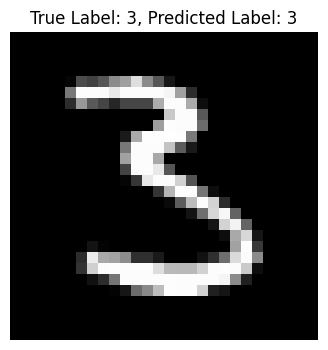

In [4]:
import matplotlib.pyplot as plt

# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 랜덤한 인덱스 선택
random_index = np.random.randint(0, len(x_test))
random_image = x_test[random_index]
random_label = y_test[random_index]

# 선택한 이미지를 모델에 입력하기 위해 전처리
input_image = random_image.reshape(1, 28, 28) / 255.0  # 이미지 스케일링 및 형태 조정

# 모델 예측
predictions = complete_NN.forward_pass(input_image)

# 예측 결과에서 가장 높은 확률을 갖는 클래스 선택
predicted_label = np.argmax(predictions)

# 이미지 출력
plt.figure(figsize=(4, 4))
plt.imshow(random_image, cmap='gray')
plt.title(f"True Label: {random_label}, Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()